In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
fuel = pd.read_csv("FuelConsumption.csv")
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## • Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',  'CO2EMISSIONS'  to  use  for  building  the model. Plot Emission values with respect to Engine size.

/home/manvendra07/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

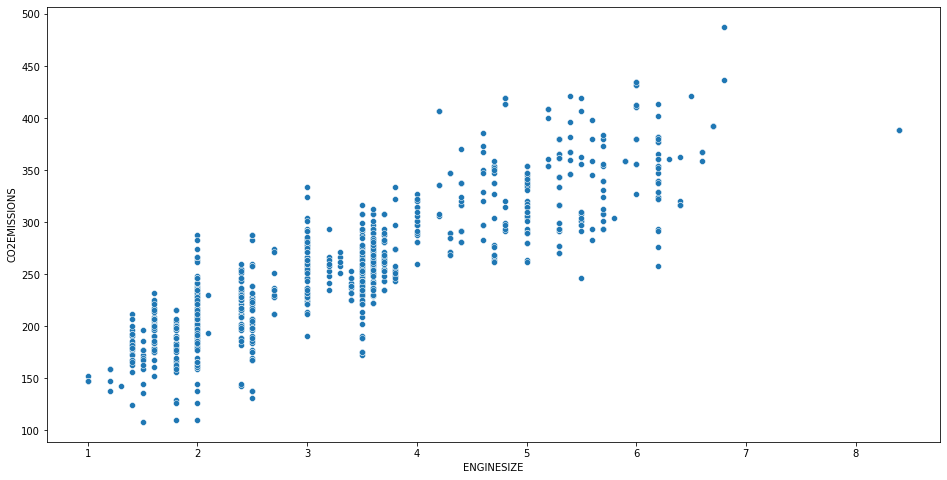

In [3]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
plt.figure(figsize = (16,8))
sns.scatterplot(fuel['ENGINESIZE'], fuel['CO2EMISSIONS'])

## • Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.

In [4]:
X = np.array(fuel[features].drop('CO2EMISSIONS', axis=1))
Y = np.array(fuel['CO2EMISSIONS'])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [6]:
def residual_sum_squares(Y_pred, Y):
    rss = np.sum(np.square(np.subtract(Y, Y_pred)))
    return rss

In [7]:
linreg = LinearRegression().fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)

print("Mean Absolute Error = ", mean_absolute_error(Y_pred, Y_test))
print("Residual Sum of Squares = ", residual_sum_squares(Y_pred, Y_test))
print("R2 Score = ", r2_score(Y_pred,Y_test))

Mean Absolute Error =  16.539300418903483
Residual Sum of Squares =  161656.61133440846
R2 Score =  0.8523599126372825


## • Try to use a polynomial regression with the dataset of degree –3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-scoreand comment on which model is the best.

In [8]:
for p in range(3,6):
    poly = make_pipeline(PolynomialFeatures(degree=p), LinearRegression())
    poly.fit(X_train,Y_train)
    Y_pred = poly.predict(X_test)
    print("\nDegree = "+str(p))
    print("Mean Absolute Error = ", mean_absolute_error(Y_pred, Y_test))
    print("Residual Sum of Squares = ", residual_sum_squares(Y_pred, Y_test))
    print("R2 Score = ", r2_score(Y_pred, Y_test))


Degree = 3
Mean Absolute Error =  10.230711579367114
Residual Sum of Squares =  87722.8057834628
R2 Score =  0.9294012922878153

Degree = 4
Mean Absolute Error =  9.645980894379898
Residual Sum of Squares =  82952.59861672464
R2 Score =  0.9287337798311084

Degree = 5
Mean Absolute Error =  8.255203267309897
Residual Sum of Squares =  74297.16372089565
R2 Score =  0.9394227817547807


#### The model with degree = 5 is the best performing as it has the lowest MSE and highest R2 score. Going further if we increase the values of Degree we find overfitting as seen below therefore it is safe to conclude that model with Degree = 5 is the best performing.

In [9]:
for p in range(6,9):
    poly = make_pipeline(PolynomialFeatures(degree=p), LinearRegression())
    poly.fit(X_train,Y_train)
    Y_pred = poly.predict(X_test)
    print("\nDegree = "+str(p))
    print("Mean Absolute Error = ", mean_absolute_error(Y_pred, Y_test))
    print("Residual Sum of Squares = ", residual_sum_squares(Y_pred, Y_test))
    print("R2 Score = ", r2_score(Y_pred, Y_test))


Degree = 6
Mean Absolute Error =  31.23133883486586
Residual Sum of Squares =  43405608.62995398
R2 Score =  0.0675327837593146

Degree = 7
Mean Absolute Error =  122.0327793149062
Residual Sum of Squares =  1141657798.095895
R2 Score =  0.0075169458505378595

Degree = 8
Mean Absolute Error =  799.8882289470273
Residual Sum of Squares =  59434242052.71706
R2 Score =  -0.004234573971988231


#### Here we can see that suddenly the MSE shoots up which tells us that there is overfitting happening.